### Import Libraries

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### Load and Preprocess Data

In [89]:
data = pd.read_csv("random_scores_with_grades.csv")

# Encode the grades
le = LabelEncoder()
data['overAllGrade'] = le.fit_transform(data['overAllGrade'])

# Display the first few rows of the dataframe
data.head()

,index,totalAttendance,quizAverage,assignmentAverage,examAverage,overAllGrade
0,1,17.52,5.38,9.48,31.83,4
1,2,23.77,13.39,10.39,35.41,4
2,3,14.62,12.73,4.08,25.37,4
3,4,83.98,78.54,76.41,89.85,0
4,5,62.12,55.65,63.45,72.96,2


### Define Features and Target

In [90]:
# Features and target
X = data[['totalAttendance', 'quizAverage', 'assignmentAverage', 'examAverage']]
y = data['overAllGrade']

### Split the Data

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

### Scale the Features

In [92]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the Model

In [93]:
# Train the RandomForestClassifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Evaluate the Model

In [94]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.955
              precision    recall  f1-score   support

           A       0.95      1.00      0.97        38
           B       0.94      0.85      0.89        20
           C       0.98      0.94      0.96        49
           D       0.79      0.85      0.81        13
           F       0.98      0.99      0.98        80

    accuracy                           0.95       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.96      0.95      0.95       200



### Predict Graduation Likelihood

In [95]:
# Example prediction
example_scores = {
    'totalAttendance':100,
    'quizAverage': 100,
    'assignmentAverage': 50,
    'examAverage': 100
}

example_scores_scaled = scaler.transform([list(example_scores.values())])
predicted_grade_index = model.predict(example_scores_scaled)[0]
predicted_grade = le.inverse_transform([predicted_grade_index])[0]

print("Predicted Grade:", predicted_grade)

Predicted Grade: A


d:\Study\WEB\Projects\btp\model\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Comparision Plot

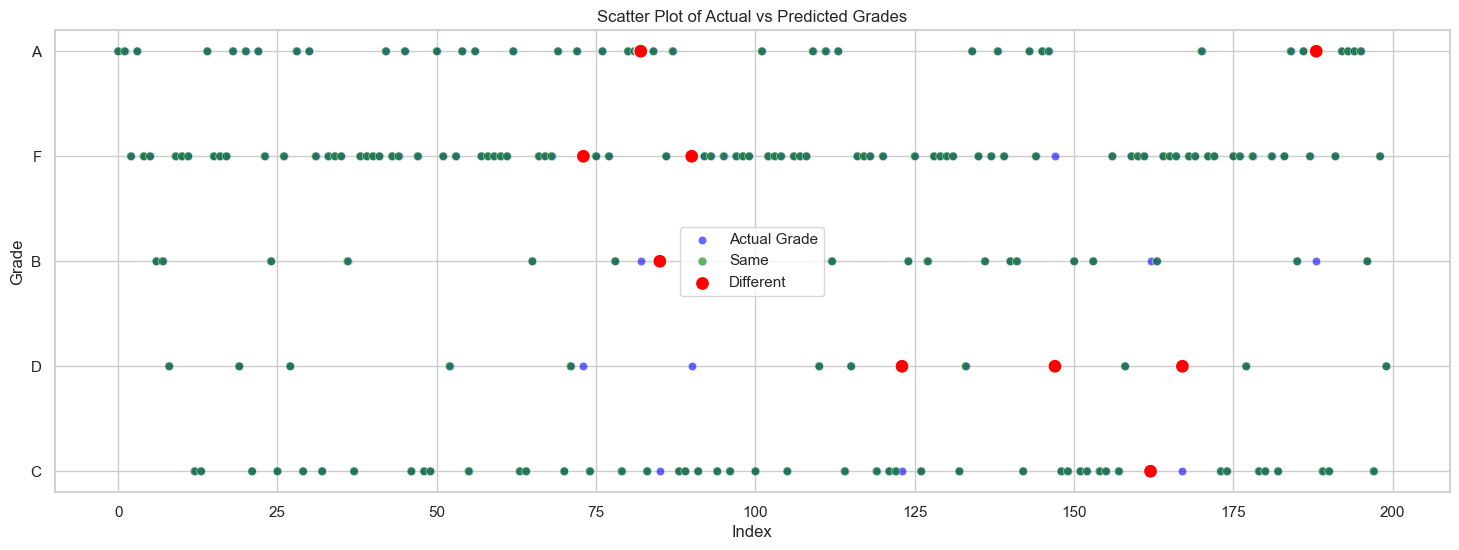

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define customizable parameters
actual_color = 'blue'
same_color = 'green'
different_color = 'red'
actual_alpha = 0.6
same_alpha = 0.6
different_alpha = 1
same_size = 40
different_size = 100

# Assuming you have the actual and predicted values
y_test_pred = model.predict(X_test_scaled)

# Create the DataFrame for plotting
comparison_df = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual Grade': le.inverse_transform(y_test),
    'Predicted Grade': le.inverse_transform(y_test_pred)
})

# Determine colors and sizes for predicted grades
comparison_df['Color'] = np.where(comparison_df['Actual Grade'] == comparison_df['Predicted Grade'], same_color, different_color)
comparison_df['Size'] = np.where(comparison_df['Color'] == different_color, different_size, same_size)
comparison_df['Alpha'] = np.where(comparison_df['Color'] == different_color, different_alpha, same_alpha)

plt.figure(figsize=(18, 6))

# Plot Actual Grades
sns.scatterplot(data=comparison_df, x='Index', y='Actual Grade', color=actual_color, label='Actual Grade', alpha=actual_alpha, edgecolor='w')

# Plot Predicted Grades with manual color and alpha assignment
for color in comparison_df['Color'].unique():
    subset = comparison_df[comparison_df['Color'] == color]
    label = 'Same' if color == same_color else 'Different'
    sns.scatterplot(data=subset, x='Index', y='Predicted Grade', color=color, label=label, alpha=subset['Alpha'].iloc[0], edgecolor='w', s=subset['Size'])

plt.title('Scatter Plot of Actual vs Predicted Grades')
plt.xlabel('Index')
plt.ylabel('Grade')
plt.legend()

plt.show()

In [97]:
import joblib

joblib.dump(model, 'model_KNC.pkl')

['model_KNC.pkl']